<a href="https://colab.research.google.com/github/maragraziani/InterpretabilityVISUM22/blob/main/UncertaintyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VISUM 2022 - Exaplainable AI - Hands on session**
# Uncertainty in white matter lesion segmentation
**written by Vatsal Raina**
* Ph.D. candidate at University of Cambridge
* Work performed during his internship at Hes-so Valais
* vr311@cam.ac.uk 

**led by Mara Graziani**
* postdoctoral researcher at Hes-so Valais and IBM Research x ZHAW
* mara.graziani@hevs.ch ; @mormontre

Content

1. Motivation 
2. Uncertainty Estimation - basics
3. Demo


## Introduction 

## Take Aways

*   List item
*   List item

### Acknowledgements and References

Papers Shifts extc




## 0. Overview


1.   Load pre-trained models
2.   Load data
3.   Prepare data
4.   Define uncertainty measures
5.   Run inference
6.   Visualise predictions and uncertainty maps



### Installation and set up

In [2]:
# Install requirements
!pip install numpy
!pip install matplotlib
!pip install torch
!pip install monai[all]==0.3.0

     |████████████████████████████████| 298 kB 25.8 MB/s 
     |████████████████████████████████| 175 kB 44.0 MB/s 
     |████████████████████████████████| 20.3 MB 1.4 MB/s 
     |████████████████████████████████| 16.6 MB 53.3 MB/s 
     |████████████████████████████████| 95.3 MB 1.2 MB/s 
     |████████████████████████████████| 15.0 MB 62.8 MB/s 
     |████████████████████████████████| 70.6 MB 8.2 kB/s 
     |████████████████████████████████| 54.5 MB 1.1 MB/s 


In [1]:
# Load pretrained models from https://drive.google.com/file/d/1pPKKRSi1u0CK8NRkwQrfMBAV8q7onkHU/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pPKKRSi1u0CK8NRkwQrfMBAV8q7onkHU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pPKKRSi1u0CK8NRkwQrfMBAV8q7onkHU" -O models.tar.gz && rm -rf /tmp/cookies.txt
!tar -xzvf models.tar.gz

--2022-05-17 07:10:28--  https://docs.google.com/uc?export=download&confirm=t&id=1pPKKRSi1u0CK8NRkwQrfMBAV8q7onkHU
Resolving docs.google.com (docs.google.com)... 172.253.63.100, 172.253.63.138, 172.253.63.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.63.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3ar1s8osr2b2eishtfmfh952ehvd6jb4/1652771400000/17412464615910489214/*/1pPKKRSi1u0CK8NRkwQrfMBAV8q7onkHU?e=download [following]
--2022-05-17 07:10:29--  https://doc-04-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3ar1s8osr2b2eishtfmfh952ehvd6jb4/1652771400000/17412464615910489214/*/1pPKKRSi1u0CK8NRkwQrfMBAV8q7onkHU?e=download
Resolving doc-04-b4-docs.googleusercontent.com (doc-04-b4-docs.googleusercontent.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to doc-04-b4-docs.googleusercontent.com (doc-04-b4

In [3]:
# Load development data from https://drive.google.com/file/d/1fvyBzSCg7JTIDf4E3R4pCU-1hwL9zSoK/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1fvyBzSCg7JTIDf4E3R4pCU-1hwL9zSoK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1fvyBzSCg7JTIDf4E3R4pCU-1hwL9zSoK" -O data.tar.gz && rm -rf /tmp/cookies.txt
!tar -xzvf data.tar.gz

--2022-05-17 07:11:25--  https://docs.google.com/uc?export=download&confirm=t&id=1fvyBzSCg7JTIDf4E3R4pCU-1hwL9zSoK
Resolving docs.google.com (docs.google.com)... 172.253.63.113, 172.253.63.139, 172.253.63.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.63.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q20ceihk23rkhadq9gnb80nvfqpapvq7/1652771475000/17412464615910489214/*/1fvyBzSCg7JTIDf4E3R4pCU-1hwL9zSoK?e=download [following]
--2022-05-17 07:11:25--  https://doc-0s-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q20ceihk23rkhadq9gnb80nvfqpapvq7/1652771475000/17412464615910489214/*/1fvyBzSCg7JTIDf4E3R4pCU-1hwL9zSoK?e=download
Resolving doc-0s-b4-docs.googleusercontent.com (doc-0s-b4-docs.googleusercontent.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to doc-0s-b4-docs.googleusercontent.com (doc-0s-b4

In [4]:
# Import libraries
import os
from glob import glob
import re
import numpy as np
import torch
#
from monai.config import print_config
from monai.data import CacheDataset, DataLoader, Dataset
from monai.inferers import sliding_window_inference
from monai.losses import DiceLoss, GeneralizedDiceLoss, TverskyLoss
from monai.metrics import compute_meandice, DiceMetric
from monai.networks.layers import Norm
from monai.networks.nets import UNet
from monai.transforms import (
    AddChanneld,Compose,CropForegroundd,LoadNiftid,Orientationd,RandCropByPosNegLabeld,
    ScaleIntensityRanged,Spacingd,ToTensord,ConcatItemsd,NormalizeIntensityd, RandFlipd,
    RandRotate90d,RandShiftIntensityd,RandAffined,RandSpatialCropd, AsDiscrete, Activations)
from monai.utils import first, set_determinism
from monai.data import write_nifti, create_file_basename, NiftiDataset

### 1. Preprocess the data 

In [5]:
path_data = "dev_in"
path_gts = "dev_in"
flair = sorted(glob(os.path.join(path_data, "*FLAIR.nii.gz")),
              key=lambda i: int(re.sub('\D', '', i)))  # Collect all flair images sorted
segs = sorted(glob(os.path.join(path_gts, "*gt.nii")),
              key=lambda i: int(re.sub('\D', '', i)))
N = (len(flair)) # Number of subjects for training/validation, by default using all subjects in the folder
indices = np.arange(N)
v=indices[:]

test_files=[]
for j in v:
    test_files = test_files + [{"image": fl, "label": seg} for fl, seg in zip(flair[j:j+1], segs[j:j+1])]

print("Testing cases:", len(test_files))
val_transforms = Compose(
[
    LoadNiftid(keys=["image", "label"]),
    AddChanneld(keys=["image","label"]),
    Spacingd(keys=["image", "label"], pixdim=(1.0, 1.0, 1.0), mode=("bilinear", "nearest")),
    NormalizeIntensityd(keys=["image"], nonzero=True),
    ToTensord(keys=["image", "label"]),
]
)

val_ds = CacheDataset(data=test_files, transform=val_transforms, cache_rate=0.5, num_workers=0)
val_loader = DataLoader(val_ds, batch_size=1, num_workers=0)

Testing cases: 7


Load and cache transformed data: 100%|██████████| 3/3 [00:15<00:00,  5.31s/it]


### 2. Define functions to compute uncertainty measures

In [6]:
"""
Implementation of standard predictive uncertainty measures for image segmentation
"""

def entropy_of_expected(probs, epsilon=1e-10):
    """
    :param probs: array [num_models, num_voxels_X, num_voxels_Y, num_voxels_Z, num_classes]
    :return: array [num_voxels_X, num_voxels_Y, num_voxels_Z,]
    """
    mean_probs = np.mean(probs, axis=0)
    log_probs = -np.log(mean_probs + epsilon)
    return np.sum(mean_probs * log_probs, axis=-1)

def expected_entropy(probs, epsilon=1e-10):
    """
    :param probs: array [num_models, num_voxels_X, num_voxels_Y, num_voxels_Z, num_classes]
    :return: array [num_voxels_X, num_voxels_Y, num_voxels_Z,]
    """
    log_probs = -np.log(probs + epsilon)
    return np.mean(np.sum(probs * log_probs, axis=-1), axis=0)


def ensemble_uncertainties_classification(probs, epsilon=1e-10):
    """
    :param probs: array [num_models, num_voxels_X, num_voxels_Y, num_voxels_Z, num_classes]
    :return: Dictionary of uncertainties
    """
    mean_probs = np.mean(probs, axis=0)
    mean_lprobs = np.mean(np.log(probs + epsilon), axis=0)
    conf = np.max(mean_probs, axis=-1)

    eoe = entropy_of_expected(probs, epsilon)
    exe = expected_entropy(probs, epsilon)

    mutual_info = eoe - exe

    epkl = -np.sum(mean_probs * mean_lprobs, axis=-1) - exe

    uncertainty = {'confidence': -1 * conf,
                   'entropy_of_expected': eoe,
                   'expected_entropy': exe,
                   'mutual_information': mutual_info,
                   'epkl': epkl,
                   'reverse_mutual_information': epkl - mutual_info
                   }

    return uncertainty

### 3. Run inference and compute estimates over ensemble of 5 models

---



In [7]:
import torch
from scipy import ndimage

# Threshold to convert probabilistic prediction into binary segmentation mask
th = 0.35
# Set number of models in ensemble
K = 5
root_dir = "baseline/"


# Set device
def get_default_device():
    if torch.cuda.is_available():
        print("Got CUDA!")
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()

models = []
for i in range(K):
    models.append(UNet(dimensions=3,in_channels=1, out_channels=2,channels=(32, 64, 128, 256, 512),
                strides=(2, 2, 2, 2),num_res_units=0).to(device))
  
act = Activations(softmax=True)

for i, model in enumerate(models):
    model.load_state_dict(torch.load(root_dir + "seed" + str(i+1) + "/Best_model_finetuning.pth", map_location=device))
    model.eval()

all_inputs = []
all_predictions = []
all_groundTruths = []
all_uncs = []

with torch.no_grad():
    for patient_count, batch_data in enumerate(val_loader):
        print("Patient num: ", patient_count)
        inputs, gt  = (
                batch_data["image"].to(device),#.unsqueeze(0),
                  batch_data["label"].type(torch.LongTensor).to(device),)#.unsqueeze(0),)
        roi_size = (96, 96, 96)
        sw_batch_size = 4

        all_outputs = []
        for model in models:
            outputs = sliding_window_inference(inputs, roi_size, sw_batch_size, model, mode='gaussian')
            outputs_o = (act(outputs))
            outputs = act(outputs).cpu().numpy()
            outputs = np.squeeze(outputs[0,1])
            all_outputs.append(outputs)
        all_outputs = np.asarray(all_outputs)
        outputs = np.mean(all_outputs, axis=0)

        # Get all uncertainties
        uncs = ensemble_uncertainties_classification( np.concatenate( (np.expand_dims(all_outputs, axis=-1), np.expand_dims(1.-all_outputs, axis=-1)), axis=-1) )
        
        outputs[outputs>th]=1
        outputs[outputs<th]=0
        seg= np.squeeze(outputs)

        val_labels = gt.cpu().numpy()
        gt = np.squeeze(val_labels)

        """
        Remove connected components smaller than 10 voxels
        """
        l_min = 9
        labeled_seg, num_labels = ndimage.label(seg)
        label_list = np.unique(labeled_seg)
        num_elements_by_lesion = ndimage.labeled_comprehension(seg,labeled_seg,label_list,np.sum,float, 0)

        seg2 = np.zeros_like(seg)
        for l in range(len(num_elements_by_lesion)):
            if num_elements_by_lesion[l] > l_min:
        # assign voxels to output
                current_voxels = np.stack(np.where(labeled_seg == l), axis=1)
                seg2[current_voxels[:, 0],
                    current_voxels[:, 1],
                    current_voxels[:, 2]] = 1
        seg=np.copy(seg2)

        # Get the Dice score
        im_sum = np.sum(seg) + np.sum(gt)
        if im_sum == 0:
            value = 1.0
            dsc = value
        else:
            value = (np.sum(seg[gt==1])*2.0) / (np.sum(seg) + np.sum(gt))
            dsc = value.sum().item()
        print("Dice score:", dsc)

        all_predictions.append(seg)
        all_groundTruths.append(gt)
        all_uncs.append(uncs)
        all_inputs.append(np.squeeze(inputs.cpu().numpy()))

        # For the sake of the investigation of interpretability, we only look at the results for the first patient
        break

Patient num:  0
Dice score: 0.8380670829419241


### 4. Visualise predictions and uncertainty maps

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

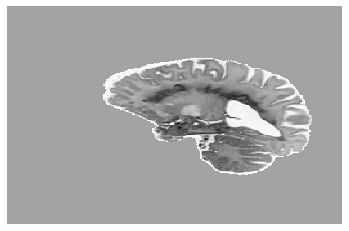

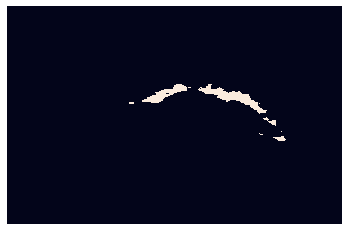

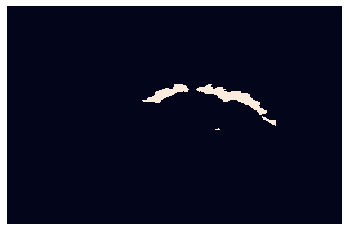

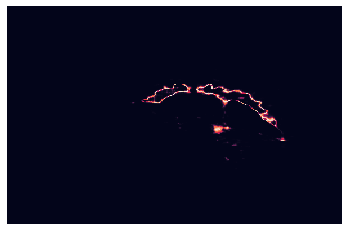

<Figure size 432x288 with 0 Axes>

In [ ]:
# Select our choice of uncertainty measure
unc_measure = "entropy_of_expected"
# Plot the first ground truth and corresponding prediction at a random slice
gt, pred, unc, inp = all_groundTruths[0], all_predictions[0], all_uncs[0][unc_measure], all_inputs[0]
slice_num=100
# eliminate uncertainty scores outside brain region
unc[inp==0] = 0
gt_slice, pred_slice, unc_slice, inp_slice = np.rot90(gt[slice_num,:,:], 1), np.rot90(pred[slice_num,:,:], 1), np.rot90(unc[slice_num,:,:], 1), np.rot90(inp[slice_num,:,:], 1)


ax = sns.heatmap(inp_slice, cbar=False, cmap="Greys", xticklabels=False, yticklabels=False)
plt.show()
plt.clf()

ax = sns.heatmap(gt_slice, cbar=False, xticklabels=False, yticklabels=False)
plt.show()
plt.clf()

sns.heatmap(pred_slice, cbar=False, xticklabels=False, yticklabels=False)
plt.show()
plt.clf()

sns.heatmap(unc_slice, cbar=False, xticklabels=False, yticklabels=False)
plt.show()
plt.clf()